<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
print("hay")
print(len(df.species)-1)
print("elementos en la columna species")

hay
149
elementos en la columna species


In [4]:
#Todo a minuscula y sin espacios"
df['species'] = df['species'].str.lower().str.strip()
#Se cambian los valores nan por default"
df.loc[df['species'].isnull(),'species'] = 'default'


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

C:\Users\javie\Anaconda3\envs\mat281\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\Users\javie\Anaconda3\envs\mat281\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\Users\javie\Anaconda3\envs\mat281\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\Users\javie\Anaconda3\envs\mat281\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


<AxesSubplot:>

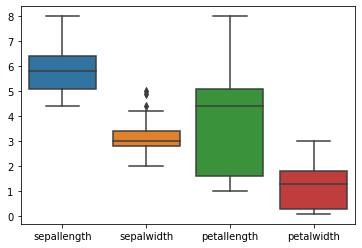

In [5]:
df.columns=df.columns.str.lower().str.strip()
df.loc[df['sepallength']=='null','sepallength']= 0
df.loc[df['sepalwidth']=='null','sepalwidth']= 0
df.loc[df['petallength']=='null','petallength']= 0
df.loc[df['petalwidth']=='null','petalwidth']= 0
sns.boxplot(data=df)


3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [6]:
#VALORES VALIDOS
lista=[]
i=0
while i<=(len(df)-1):
    if df['sepallength'][i]>=4.0 and df['sepallength'][i]<=7.0:
        if df['sepalwidth'][i]>=2.0 and df['sepalwidth'][i]<=4.5:
            if df['petallength'][i]>=1.0 and df['petallength'][i]<=7.0:
                if df['petalwidth'][i]>=0.1 and df['petalwidth'][i]<=2.5:
                    lista.append('validar')
                    i+=1
                else:
                    lista.append('invalidar')
                    i+=1
            else:
                lista.append('invalidar')
                i+=1
        else:
            lista.append('invalidar')
            i+=1
    else:
        lista.append('invalidar')
        i+=1
df.insert(5,'label',lista)

4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

<AxesSubplot:xlabel='sepallength', ylabel='petallength'>

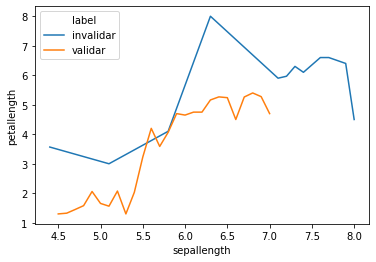

In [7]:
sns.lineplot(
    x='sepallength',
    y='petallength',
    hue='label',
    data=df,
    ci = None,
)

<AxesSubplot:xlabel='sepalwidth', ylabel='petalwidth'>

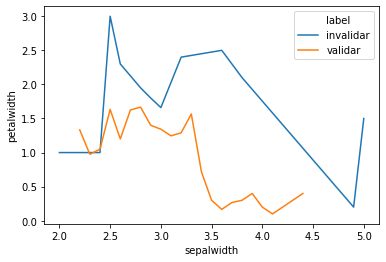

In [9]:
sns.lineplot(
    x='sepalwidth',
    y='petalwidth',
    hue='label',
    data=df,
    ci = None,
)

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

<AxesSubplot:xlabel='sepallength', ylabel='petallength'>

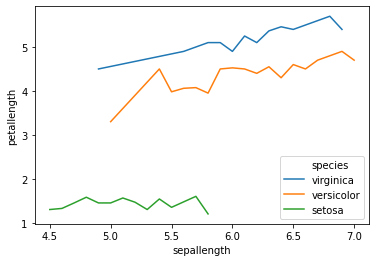

In [18]:
#Se filtran las tres columnas
mask_sepallength_inf =  df['sepallength']>=4.0
mask_sepallength_sup =  df['sepallength']<=7.0
mask_sepallength= mask_sepallength_inf & mask_sepallength_sup 

mask_sepalwidth_inf =  df['sepalwidth']>=2.0
mask_sepalwidth_sup =  df['sepalwidth']<=4.5
mask_sepalwidth= mask_sepalwidth_inf & mask_sepalwidth_sup

mask_petallength_inf =  df['petallength']>=1.0
mask_petallength_sup =  df['petallength']<=7.0
mask_petallength= mask_petallength_inf & mask_petallength_sup

mask_petalwidth_inf =  df['petalwidth']>=0.1
mask_petalwidth_sup =  df['petalwidth']<=2.5
mask_petalwidth= mask_petalwidth_inf & mask_petalwidth_sup

mask_species=df['species']!='default'

df_filtrado= df[mask_sepallength & mask_sepalwidth & mask_petallength & mask_petalwidth & mask_species]
sns.lineplot(
    x='sepallength',
    y='petallength',
    hue='species',
    data=df_filtrado,
    ci = None,
)

